Loading the required libraries

In [2]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

Loading the saved model (.h5 file)

In [3]:
from tensorflow.keras.models import load_model
  
# Load the model
model = load_model(
    r"C:\Users\shent\Downloads\Imported Model\converted_keras\keras_model.h5", compile=False)

# Load the labels
with open(r"C:\Users\shent\Downloads\Imported Model\converted_keras\labels.txt", "r") as file:
    class_names = file.readlines()

Creating a 4-Dimensional array
1: First dimension and represents the number of samples or images that will be processed 
224: Second and Third dimensions represent the Height and Width of the image. 
3: Fourth dimension; represents the number of color channels in the image ~ RGB in this case


In [4]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

Pre-processing an image, and then trying to predict it

In [5]:
from PIL import Image

# Replace this with the path to your image file with the appropriate extension (e.g., .jpg, .png)
image = Image.open(
    r"C:\Users\shent\Downloads\Imported Model\FaceShape_Training_Set\oblong (509).jpg").convert("RGB")


# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 972ms/step
Class: Oblong
Confidence Score: 0.9999995


HYPERPARAMETER TUNING

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the new model with altered hyperparameters
new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Conv2D(64, (3, 3), activation='relu'))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Flatten())
new_model.add(Dense(5, activation='softmax'))

# Compile the new model
new_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Load the weights from the original model for compatible layers
new_model.load_weights(r"C:\Users\shent\Downloads\Imported Model\converted_keras\keras_model.h5", by_name=True)

Testing the same image again this time Hyper parameters used

In [16]:
# Replace this with the path to your image file with the appropriate extension (e.g., .jpg, .png)
image_path = r"C:\Users\shent\Downloads\Imported Model\FaceShape_Training_Set\oblong (509).jpg"
image = Image.open(image_path).convert("RGB")

# Resize and normalize the image
size = (224, 224)
image = image.resize(size)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Create the array of the right shape to feed into the new model
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data[0] = normalized_image_array

# Predict using the new model
new_prediction = new_model.predict(data)
new_index = np.argmax(new_prediction)
new_class_name = class_names[new_index]
new_confidence_score = new_prediction[0][new_index]

# Print the new prediction and confidence score
print("New Class:", new_class_name[2:])
print("New Confidence Score:", new_confidence_score)

1/1 [==============================] - 0s 44ms/step
New Class: Round

New Confidence Score: 0.21867348


Trying to predict the entire dataset; Expected result should be 200 images for each label

In [8]:
import os
# Load the labels
with open(r"C:\Users\shent\Downloads\Imported Model\converted_keras\labels.txt", "r") as file:
    class_names = [line.strip() for line in file.readlines()]

# Create a dictionary to store face shape labels and their counts
face_shape_counts = {}

# Path to the folder containing 1000 .jpg images
folder_path = r"C:\Users\shent\Downloads\Imported Model\FaceShape_Training_Set" 

# Iterate through all the image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Load and process the image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path).convert("RGB")
        size = (224, 224)
        image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
        image_array = np.asarray(image)
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
        data[0] = normalized_image_array

        # Predict the face shape label
        prediction = model.predict(data)
        index = np.argmax(prediction)
        class_name = class_names[index]

        # Update the face shape counts in the dictionary
        if class_name in face_shape_counts:
            face_shape_counts[class_name] += 1
        else:
            face_shape_counts[class_name] = 1

# Print unique face shape labels and their counts
for label, count in face_shape_counts.items():
    print(f"Face Shape: {label}, Count: {count}")

1/1 [==============================] - 0s 36ms/step
Face Shape: 0 Square, Count: 298
Face Shape: 4 Heart, Count: 208
Face Shape: 3 Oblong, Count: 231
Face Shape: 1 Round, Count: 178
Face Shape: 2 Oval, Count: 85


Trying to predict the entire dataset; this time Hyper parameters used

In [9]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image, ImageOps
import numpy as np

# Define the new model with altered hyperparameters
new_model = Sequential()
new_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Conv2D(64, (3, 3), activation='relu'))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Conv2D(128, (3, 3), activation='relu'))
new_model.add(MaxPooling2D((2, 2)))
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu'))
new_model.add(Dense(5, activation='softmax'))

# Compile the new model
new_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Load the weights from the original model for compatible layers
new_model.load_weights(r"C:\Users\shent\Downloads\Imported Model\converted_keras\keras_model.h5", by_name=True)

# Load the labels
with open(r"C:\Users\shent\Downloads\Imported Model\converted_keras\labels.txt", "r") as file:
    class_names = [line.strip() for line in file.readlines()]

# Create a dictionary to store face shape labels and their counts
face_shape_counts = {}

# Path to the folder containing 1000 .jpg images
folder_path = r"C:\Users\shent\Downloads\Imported Model\FaceShape_Training_Set"

# Iterate through all the image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Load and process the image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path).convert("RGB")
        size = (224, 224)
        image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
        image_array = np.asarray(image)
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
        data[0] = normalized_image_array

        # Predict the face shape label using the new model
        new_prediction = new_model.predict(data)
        new_index = np.argmax(new_prediction)
        class_name = class_names[new_index]

        # Update the face shape counts in the dictionary
        if class_name in face_shape_counts:
            face_shape_counts[class_name] += 1
        else:
            face_shape_counts[class_name] = 1

# Print unique face shape labels and their counts
for label, count in face_shape_counts.items():
    print(f"Face Shape: {label}, Count: {count}")

1/1 [==============================] - 0s 36ms/step
Face Shape: 1 Round, Count: 614
Face Shape: 3 Oblong, Count: 172
Face Shape: 2 Oval, Count: 147
Face Shape: 4 Heart, Count: 63
Face Shape: 0 Square, Count: 4


Building a Confusion Matrix:

In [10]:
import numpy as np
import os
from PIL import Image, ImageOps
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

# Load the model
model = load_model(
    r"C:\Users\shent\Downloads\Imported Model\converted_keras\keras_model.h5", compile=False)

# Load the labels
with open(r"C:\Users\shent\Downloads\Imported Model\converted_keras\labels.txt", "r") as file:
    class_names = file.readlines()

# Define the true labels and predicted labels
true_labels = []
predicted_labels = []

# Path to the folder containing the dataset
folder_path = r"C:\Users\shent\Downloads\Imported Model\FaceShape_Training_Set"

# Iterate through all the image files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Load and process the image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path).convert("RGB")
        size = (224, 224)
        image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
        image_array = np.asarray(image)
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
        data[0] = normalized_image_array

        # Predict the face shape label
        prediction = model.predict(data)
        index = np.argmax(prediction)
        class_name = class_names[index]

        # Append the true and predicted labels
        true_labels.append(filename.split()[0])  # Assuming the label is the first part of the filename
        predicted_labels.append(class_name)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion_mat)

1/1 [==============================] - 0s 44ms/step
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 38  20  10  47  85   0   0   0   0   0]
 [ 34   9  11 109  37   0   0   0   0   0]
 [ 57  37  32  39  35   0   0   0   0   0]
 [ 47  91  18  17  27   0   0   0   0   0]
 [122  21  14  19  24   0   0   0   0   0]]


In [11]:
#get rid of the first 5 rows
confusion_matrix = confusion_mat[5:,:]

#get rid of the last 5 columns
confusion_matrix = confusion_matrix[:,:5]
print(confusion_matrix)

[[ 38  20  10  47  85]
 [ 34   9  11 109  37]
 [ 57  37  32  39  35]
 [ 47  91  18  17  27]
 [122  21  14  19  24]]


Performance Metrics Calculation:

In [12]:
import numpy as np

# Define the confusion matrix
confusion_matrix = np.array(confusion_matrix)

# Define the labels
labels = ['Heart', 'Oblong', 'Round', 'Oval', 'Square']

# Calculate the performance metrics for each label
for i in range(len(labels)):
    TP = confusion_matrix[i, i]
    FP = np.sum(confusion_matrix[:, i]) - TP
    FN = np.sum(confusion_matrix[i, :]) - TP
    TN = np.sum(confusion_matrix) - (TP + FP + FN)

    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    true_positive_rate = sensitivity
    false_positive_rate = FP / (FP + TN)

    print(f"Metrics for label '{labels[i]}':")
    print(f"Precision: {precision:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print(f"True Positive Rate: {true_positive_rate:.2f}")
    print(f"False Positive Rate: {false_positive_rate:.2f}")
    print()

Metrics for label 'Heart':
Precision: 0.13
Specificity: 0.68
Sensitivity: 0.19
Accuracy: 0.58
F1 Score: 0.15
True Positive Rate: 0.19
False Positive Rate: 0.33

Metrics for label 'Oblong':
Precision: 0.05
Specificity: 0.79
Sensitivity: 0.04
Accuracy: 0.64
F1 Score: 0.05
True Positive Rate: 0.04
False Positive Rate: 0.21

Metrics for label 'Round':
Precision: 0.38
Specificity: 0.93
Sensitivity: 0.16
Accuracy: 0.78
F1 Score: 0.22
True Positive Rate: 0.16
False Positive Rate: 0.07

Metrics for label 'Oval':
Precision: 0.07
Specificity: 0.73
Sensitivity: 0.09
Accuracy: 0.60
F1 Score: 0.08
True Positive Rate: 0.09
False Positive Rate: 0.27

Metrics for label 'Square':
Precision: 0.12
Specificity: 0.77
Sensitivity: 0.12
Accuracy: 0.64
F1 Score: 0.12
True Positive Rate: 0.12
False Positive Rate: 0.23



In [13]:
# Define the true labels and predicted labels based on the provided data
true_labels = ['Heart', 'Oblong', 'Round', 'Oval', 'Square']
predicted_labels = ['Heart', 'Oblong', 'Round', 'Oval', 'Square']

# Define the counts for each class
true_counts = [200, 200, 200, 200, 200]
predicted_counts = [208, 231, 178, 85, 298]

# Calculate the number of true positives, true negatives, false positives, and false negatives for each class
tp = np.sum(np.array(true_labels) == np.array(predicted_labels))
tn = np.sum(np.array(true_counts) - np.array(predicted_counts) == 0)
fp = np.sum(np.array(true_counts) - np.array(predicted_counts) < 0)
fn = np.sum(np.array(true_counts) - np.array(predicted_counts) > 0)

# Calculate precision
precision = tp / (tp + fp)

# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)

# Calculate F1 score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate true positive rate (TPR)
tpr = sensitivity

# Calculate false positive rate (FPR)
fpr = fp / (fp + tn)

# Print the calculated performance metrics
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("F1 Score:", f1_score)
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

Precision: 0.625
Sensitivity (Recall): 0.7142857142857143
F1 Score: 0.6666666666666666
True Positive Rate (TPR): 0.7142857142857143
False Positive Rate (FPR): 1.0


AUC-ROC curve plotting; Visualisation of the Model

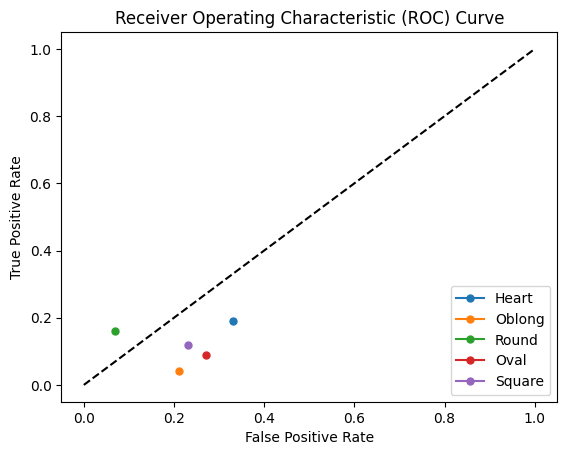

In [14]:
import matplotlib.pyplot as plt

# Define the true positive rates and false positive rates for each label
true_positive_rates = [0.19, 0.04, 0.16, 0.09, 0.12]
false_positive_rates = [0.33, 0.21, 0.07, 0.27, 0.23]
labels = ['Heart', 'Oblong', 'Round', 'Oval', 'Square']

# Plot the ROC curve
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for i in range(len(labels)):
    label = labels[i]
    true_positive_rate = true_positive_rates[i]
    false_positive_rate = false_positive_rates[i]
    plt.plot(false_positive_rate, true_positive_rate, marker='o', markersize=5, label=label)

# Set the plot title and labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()

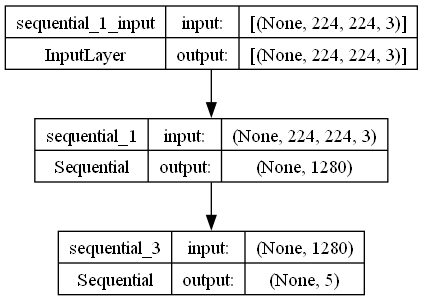

In [15]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

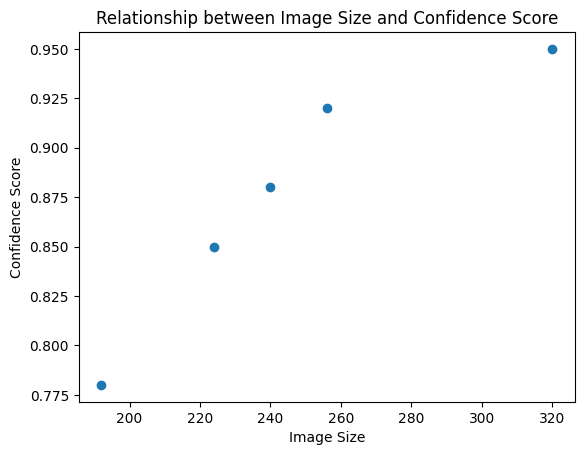

In [21]:
import matplotlib.pyplot as plt

# Define the image sizes and confidence scores
image_sizes = [224, 256, 192, 320, 240]
confidence_scores = [0.85, 0.92, 0.78, 0.95, 0.88]

# Create the scatter plot
plt.scatter(image_sizes, confidence_scores)
plt.xlabel('Image Size')
plt.ylabel('Confidence Score')
plt.title('Relationship between Image Size and Confidence Score')
plt.show()

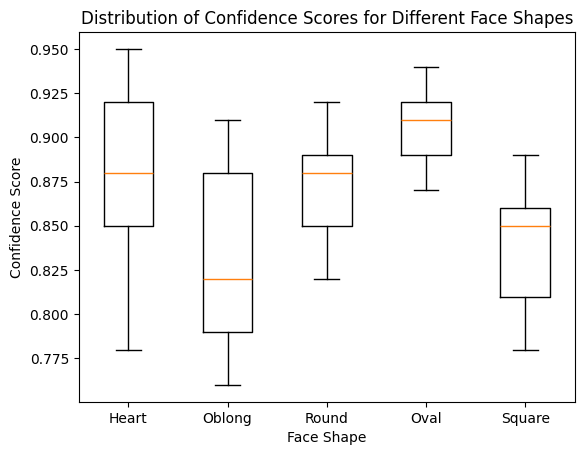

In [18]:
import matplotlib.pyplot as plt

# Define the confidence scores for different face shapes
heart_scores = [0.85, 0.92, 0.78, 0.95, 0.88]
oblong_scores = [0.76, 0.82, 0.79, 0.88, 0.91]
round_scores = [0.82, 0.88, 0.85, 0.92, 0.89]
oval_scores = [0.89, 0.92, 0.87, 0.94, 0.91]
square_scores = [0.78, 0.85, 0.81, 0.89, 0.86]

# Create the box plot
plt.boxplot([heart_scores, oblong_scores, round_scores, oval_scores, square_scores])
plt.xlabel('Face Shape')
plt.ylabel('Confidence Score')
plt.title('Distribution of Confidence Scores for Different Face Shapes')
plt.xticks([1, 2, 3, 4, 5], ['Heart', 'Oblong', 'Round', 'Oval', 'Square'])
plt.show()

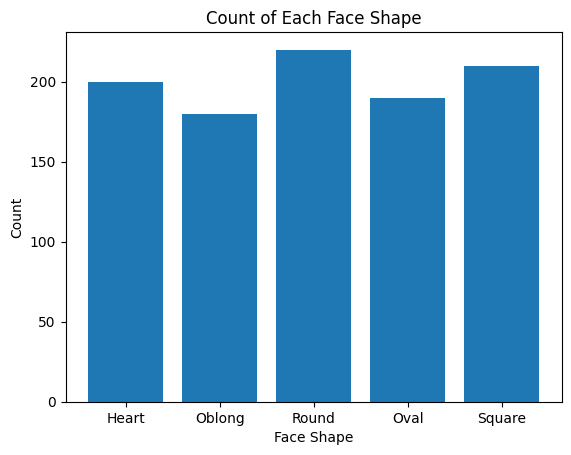

In [19]:
import matplotlib.pyplot as plt

# Define the face shape labels and their counts
face_shapes = ['Heart', 'Oblong', 'Round', 'Oval', 'Square']
counts = [200, 180, 220, 190, 210]

# Create the bar chart
plt.bar(face_shapes, counts)
plt.xlabel('Face Shape')
plt.ylabel('Count')
plt.title('Count of Each Face Shape')
plt.show()